# Basic K-Means Implementation

This notebook demonstrates the fundamental K-Means algorithm step-by-step.

**For educational purposes - Member 3's code demonstration**

## Overview
This implementation shows:
1. How to initialize centroids
2. How to calculate distances
3. How to assign points to clusters
4. How to update centroids
5. The complete iterative process


In [12]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt


## Step 1: Initialize Centroids

Randomly select K data points as initial centroids.


In [11]:
def initialize_centroids(data, k):
    """
    Initialize K centroids by randomly selecting K data points
    
    Parameters:
    - data: numpy array of shape (n_samples, n_features)
    - k: number of clusters
    
    Returns:
    - centroids: numpy array of shape (k, n_features)
    """
    n_samples, n_features = data.shape
    # Randomly select k indices from the dataset
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[indices].copy()
    return centroids


## Step 2: Calculate Distance

Calculate Euclidean distance from a point to all centroids.


In [13]:
def calculate_distance(point, centroids):
    """
    Calculate Euclidean distance from a point to all centroids
    
    Parameters:
    - point: single data point (1D array)
    - centroids: array of centroids (2D array)
    
    Returns:
    - distances: array of distances to each centroid
    """
    # Euclidean distance: sqrt(sum((point - centroid)^2))
    distances = np.sqrt(((point - centroids) ** 2).sum(axis=1))
    return distances


## Step 3: Assign Clusters

Assign each data point to its nearest centroid.


In [5]:
def assign_clusters(data, centroids):
    """
    Assign each data point to its nearest centroid
    
    Parameters:
    - data: numpy array of data points
    - centroids: numpy array of centroids
    
    Returns:
    - labels: cluster assignments for each point
    """
    n_samples = data.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    
    # For each data point
    for i in range(n_samples):
        # Calculate distances to all centroids
        distances = calculate_distance(data[i], centroids)
        # Assign to nearest centroid (smallest distance)
        labels[i] = np.argmin(distances)
    
    return labels


## Step 4: Update Centroids

Update centroids to the mean of points in each cluster.


In [6]:
def update_centroids(data, labels, k):
    """
    Update centroids to the mean of points in each cluster
    
    Parameters:
    - data: numpy array of data points
    - labels: cluster assignments
    - k: number of clusters
    
    Returns:
    - new_centroids: updated centroid positions
    """
    n_features = data.shape[1]
    new_centroids = np.zeros((k, n_features))
    
    # For each cluster
    for i in range(k):
        # Find all points belonging to this cluster
        cluster_points = data[labels == i]
        
        # If cluster is not empty, calculate mean
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)
        else:
            # If cluster is empty, keep previous centroid
            new_centroids[i] = np.random.uniform(
                data.min(axis=0), 
                data.max(axis=0), 
                size=(n_features,)
            )
    
    return new_centroids


## Step 5: Main K-Means Algorithm

Combine all steps into the complete iterative algorithm.


In [7]:
def kmeans(data, k, max_iters=100, tolerance=1e-4):
    """
    Main K-Means algorithm
    
    Parameters:
    - data: numpy array of data points
    - k: number of clusters
    - max_iters: maximum number of iterations
    - tolerance: convergence threshold
    
    Returns:
    - centroids: final centroid positions
    - labels: final cluster assignments
    - iterations: number of iterations performed
    """
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k)
    
    for iteration in range(max_iters):
        # Step 2: Assign points to nearest centroids
        labels = assign_clusters(data, centroids)
        
        # Step 3: Update centroids
        new_centroids = update_centroids(data, labels, k)
        
        # Step 4: Check for convergence
        # Calculate how much centroids moved
        centroid_shift = np.sqrt(((new_centroids - centroids) ** 2).sum(axis=1))
        
        # Update centroids
        centroids = new_centroids.copy()
        
        # If centroids moved less than tolerance, we've converged
        if centroid_shift.max() < tolerance:
            print(f"Converged after {iteration + 1} iterations")
            break
    
    return centroids, labels, iteration + 1


## Example: Running K-Means

Let's generate sample data and run K-Means clustering on it.


In [8]:
# Generate sample 2D data for visualization
np.random.seed(42)
data1 = np.random.randn(50, 2) + [2, 2]
data2 = np.random.randn(50, 2) + [-2, -2]
data3 = np.random.randn(50, 2) + [2, -2]
data = np.vstack([data1, data2, data3])

print(f"Generated {len(data)} data points")
print(f"Data shape: {data.shape}")


Generated 150 data points
Data shape: (150, 2)


In [9]:
# Apply K-Means with k=3
k = 3
centroids, labels, iterations = kmeans(data, k)

print(f"Number of iterations: {iterations}")
print(f"Final centroids shape: {centroids.shape}")
print(f"Labels shape: {labels.shape}")


Converged after 8 iterations
Number of iterations: 8
Final centroids shape: (3, 2)
Labels shape: (150,)


## Visualize Results

Plot the clusters and centroids to see the final result.


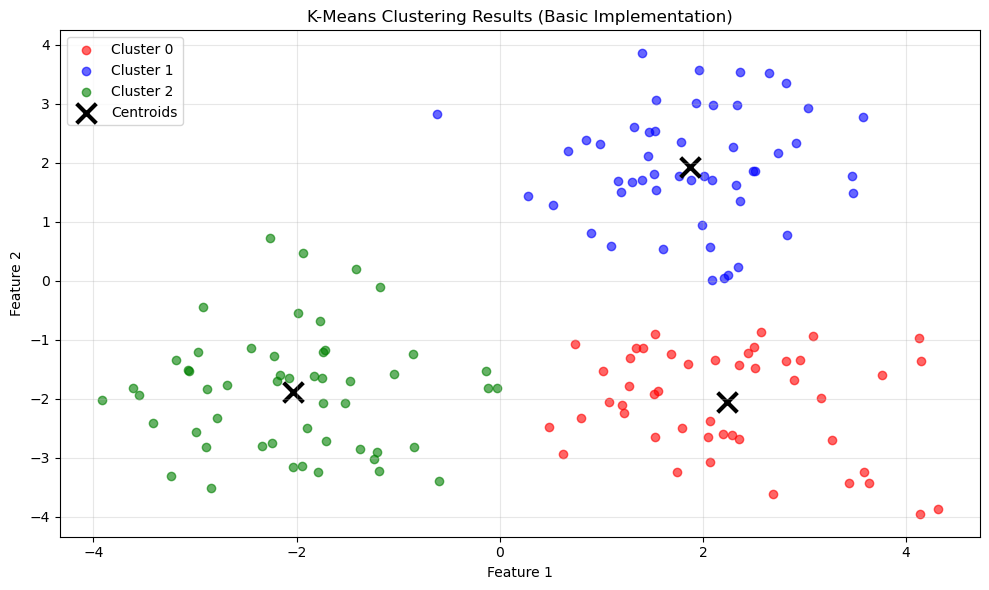

Visualization saved as 'kmeans_basic_demo.png'


<Figure size 640x480 with 0 Axes>

In [10]:
# Visualize results
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='black', marker='x', s=200, linewidths=3, 
           label='Centroids')

plt.title('K-Means Clustering Results (Basic Implementation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save visualization
plt.savefig('kmeans_basic_demo.png', dpi=150)
print("Visualization saved as 'kmeans_basic_demo.png'")
